# Importing all used libraries and reading the dataset

In [1212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('titanic-passengers.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


# Checking the sum of the nulls and filling the missing values using the fillna() function or dropping unnecessary columns/rows using the drop() and dropna() function depending on the nulls count.

In [1213]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1214]:
df.drop(["Cabin"], axis = 1, inplace = True)

df["Age"].fillna(df["Age"].mean(), inplace= True)

df.dropna(axis = 0, how='any', subset=['Embarked'], inplace= True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Rounding up the Age and converting it into "int" data type

In [1215]:
df['Age'].apply(np.ceil)

0      28.0
1      25.0
2      20.0
3      29.0
4      31.0
       ... 
886    14.0
887    22.0
888    30.0
889    30.0
890    19.0
Name: Age, Length: 889, dtype: float64

In [1216]:
df['Age']=df['Age'].astype(int)

# Checking the data type of the columns and changing the needed ones using the LabelEncoder() function

In [1217]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Survived'] = label_encoder.fit_transform(df['Survived'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int32  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int32  
 5   Age          889 non-null    int32  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int32  
dtypes: float64(1), int32(4), int64(4), object(2)
memory usage: 69.5+ KB


# Visualising the correlation between the columns using a heatmap to proceed to feature selection and dropping unnecessary columns

<AxesSubplot:>

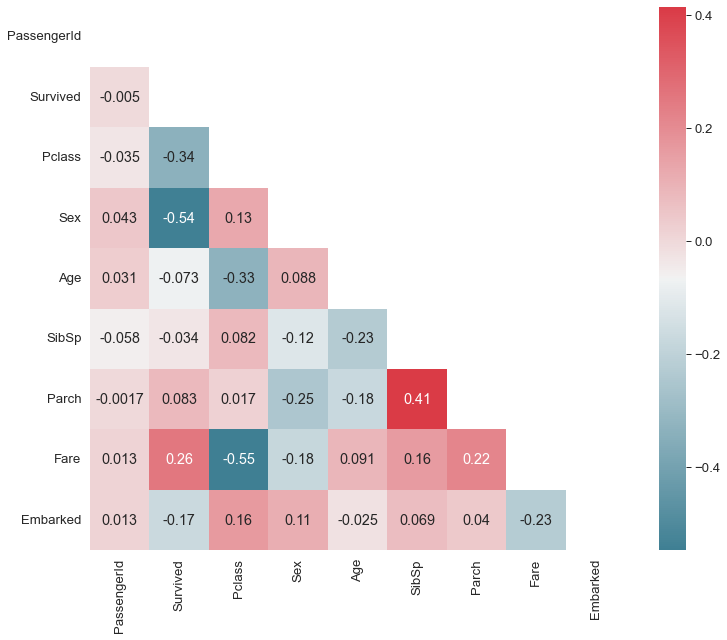

In [1218]:
corr = df.corr()

f, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)

In [1219]:
df.drop(["PassengerId","Embarked","Ticket"], axis = 1, inplace = True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,2,"Collander, Mr. Erik Gustaf",1,28,0,0,13.0000
1,0,3,"Moen, Mr. Sigurd Hansen",1,25,0,0,7.6500
2,0,3,"Jensen, Mr. Hans Peder",1,20,0,0,7.8542
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29,0,4,21.0750
4,0,1,"Davidson, Mr. Thornton",1,31,1,0,52.0000
...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,30.0708
887,0,3,"Sirayanian, Mr. Orsen",1,22,0,0,7.2292
888,0,3,"Cacic, Miss. Marija",0,30,0,0,8.6625
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29,0,0,7.8958


# The graph below shows the count of males and females in every age range.

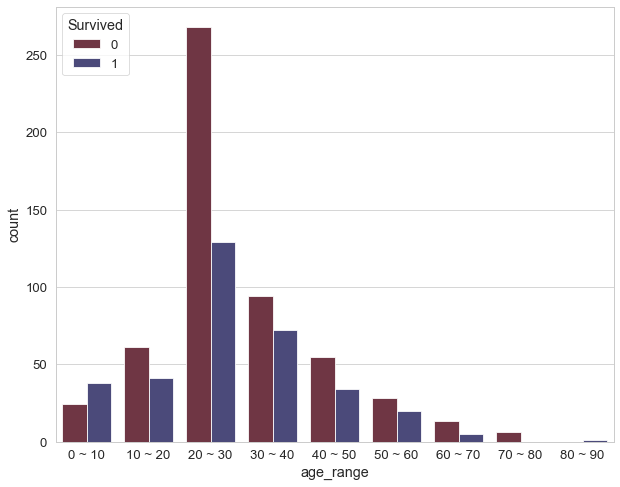

In [1220]:
#Function to calculate the age range
def age_range(num):
    for i in range(1, 10):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'
#Creating the age range column.
df['age_range'] = df['Age'].apply(age_range)
df = df.sort_values("Age")
sns.countplot(x='age_range', hue='Survived', data=df, palette='icefire_r')
sns.set_style("whitegrid")
fig = plt.gcf()
fig.set_size_inches(10, 8)

### As we can see, the majority of the passengers on the Titanic ship were in their 20s

# After we visualized the count of each age range, let's visualize the survival rate for males and females based on their age range.

C:\Users\yusuf\AppData\Local\Temp\ipykernel_17372\3944131748.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(a, ignore_index = True)
C:\Users\yusuf\AppData\Local\Temp\ipykernel_17372\3944131748.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(b, ignore_index = True)


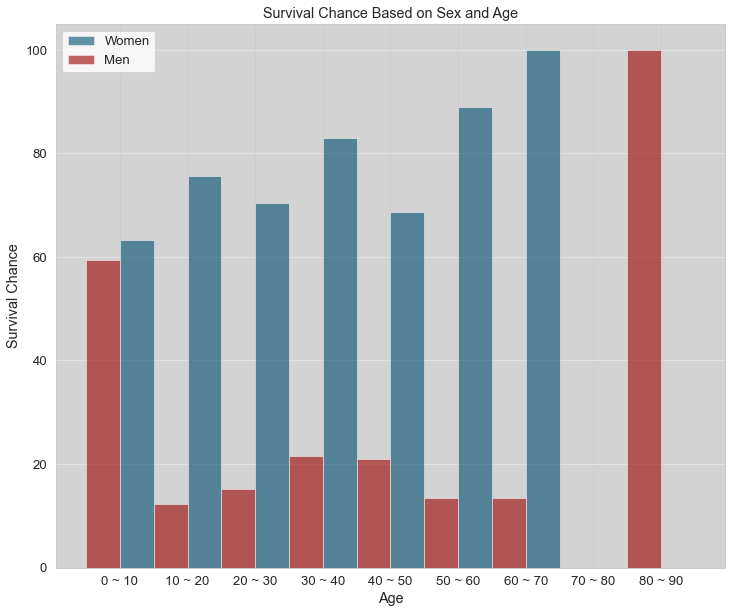

In [1221]:
#adding fake data that wouldn't affect the calculations but to make the age range 
#column equal and reach the 80 ~ 90 range for females so we avoid the Value error:shape mismatch 
a = {'Age':85, 'Survived':0, 'Sex':0}
b = {'Age':75, 'Survived':0, 'Sex':0}
df = df.append(a, ignore_index = True)
df = df.append(b, ignore_index = True)

#Recalculating the age range with the same function used above after we added the fake data
def age_range(num):
    for i in range(1, 10):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'
df['Age'].astype(int)
df['age_range'] = df['Age'].apply(age_range)
t = np.unique(np.array(df['age_range']))
x = np.arange(len(t))

#Calculating the Survival rate for males
mendf = df.copy()
mendf.drop(mendf[mendf['Sex'] == 0].index, inplace = True)
men_titanic_age = mendf[['age_range', 'Survived']].groupby('age_range')['Survived'].value_counts().sort_index().unstack().fillna(0)
men_titanic_age['Men Survival rate'] = men_titanic_age[1] / (men_titanic_age[0] + men_titanic_age[1]) * 100

#Calculating the Survival rate for females
womendf = df.copy()
womendf.drop(womendf[womendf['Sex'] == 1].index, inplace = True)
women_titanic_age = womendf[['age_range', 'Survived']].groupby('age_range')['Survived'].value_counts().sort_index().unstack().fillna(0) 
women_titanic_age['Woman Survival rate'] = women_titanic_age[1] / (women_titanic_age[0] + women_titanic_age[1]) * 100


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
plt.xticks(x, t)
plt.bar(x+0.25, women_titanic_age['Woman Survival rate'], 0.5, label='Women', alpha=0.6, color='#004c70')
plt.bar(x-0.25, men_titanic_age['Men Survival rate'], 0.5, label='Men', alpha=0.6, color='#990000')
sns.set_context("paper", font_scale=1.5)
plt.xlabel("Age")
plt.ylabel("Survival Chance")
plt.title("Survival Chance Based on Sex and Age")
ax.set_facecolor('lightgrey')
plt.legend()
plt.grid(color = 'white', linestyle = '--', axis = 'y', linewidth = 0.5)
plt.show()

### We can conclude from the graph above that the survival rate of females is much higher than males, and passengers over 80, and below 10 years old had higher chances to survive than others. 

In [1222]:
#dropping the fake data that we added so we can complete our calculations
df.drop(df.tail(2).index,inplace=True)

# Visualizing the correlation between people who survived and who didn't based on the fare they paid

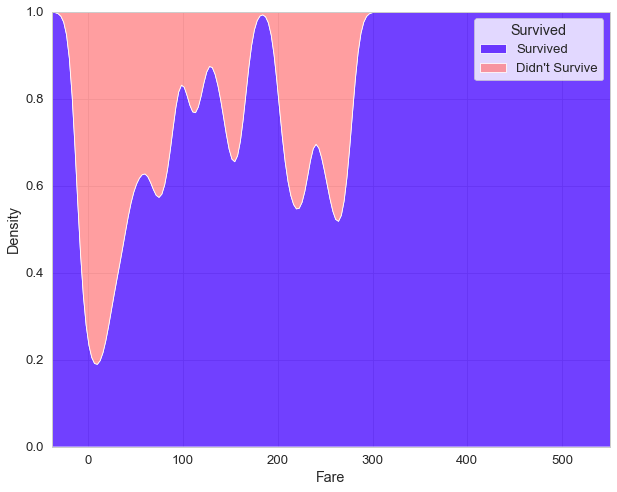

In [1223]:
sns.kdeplot(data=df, x='Fare', hue='Survived', multiple='fill', palette="gnuplot2_r")
plt.legend(title='Survived', loc='best', labels=['Survived', "Didn't Survive"])
sns.set_context("paper", font_scale=1.5)
fig = plt.gcf()
fig.set_size_inches(10, 8)

In [1224]:
#Creating a Dataframe that contains all the Pclass info
#such as the count, survival rate, percentage of each Pclass...etc.
Pclass = df[['Pclass', 'Survived']].groupby('Pclass')['Survived'].value_counts().sort_index().unstack().fillna(0)
Pclass['Survival rate'] = Pclass[1] / (Pclass[0] + Pclass[1]) * 100
Pclass['Death rate'] = 100 - Pclass['Survival rate']
Pclass['Count'] = Pclass[0] + Pclass[1]
total = Pclass[0].sum() + Pclass[1].sum()
Pclass['Percentage'] = (Pclass['Count'] * 100) / total
labels=['Pclass 1', 'Pclass 2', 'Pclass 3']
Pclass

Survived,0,1,Survival rate,Death rate,Count,Percentage
Pclass,,,,,,
1.0,80,134,62.616822,37.383178,214,24.071991
2.0,97,87,47.282609,52.717391,184,20.697413
3.0,372,119,24.236253,75.763747,491,55.230596


# Visualizing the Pclass percentages of the whole dataframe and the Survival correlation for each Pclass

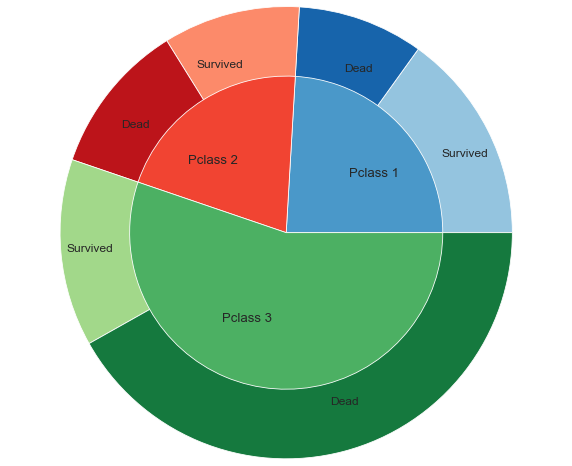

In [1225]:
#Declaring the values and their labels
group_names=['Pclass 1', 'Pclass 2', 'Pclass 3']
group_size=Pclass['Percentage']
subgroup_names=['Survived', 'Dead', 'Survived', 'Dead', 'Survived', 'Dead']
subgroup_size=[]
for i in range(0,3):
    subgroup_size.append((Pclass['Percentage'].iloc[i] * Pclass['Survival rate'].iloc[i]) / 100)
    subgroup_size.append((Pclass['Percentage'].iloc[i] * Pclass['Death rate'].iloc[i]) / 100)


a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.YlGn]
fig, ax = plt.subplots()
ax.axis('equal')
#Inner pie
mypie, _ = ax.pie(group_size, radius=1, labels=group_names, labeldistance=0.5, colors= [a(0.6), b(0.6), c(0.6)])
plt.setp( mypie, width=1, edgecolor='white')
#Outer pie
mypie2, _ = ax.pie(subgroup_size, radius=1.3, 
labels=subgroup_names, labeldistance=0.77, colors=[a(0.4), a(0.8), b(0.4), b(0.8), c(0.4), c(0.8)], textprops={'fontsize': 12})
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
sns.set_context("paper", font_scale=1.5)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### We can conclude that Pclass 3 had the lowest survival chance while Pclass 1 had the highest with a survival rate of 62.6%

In [1226]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
 

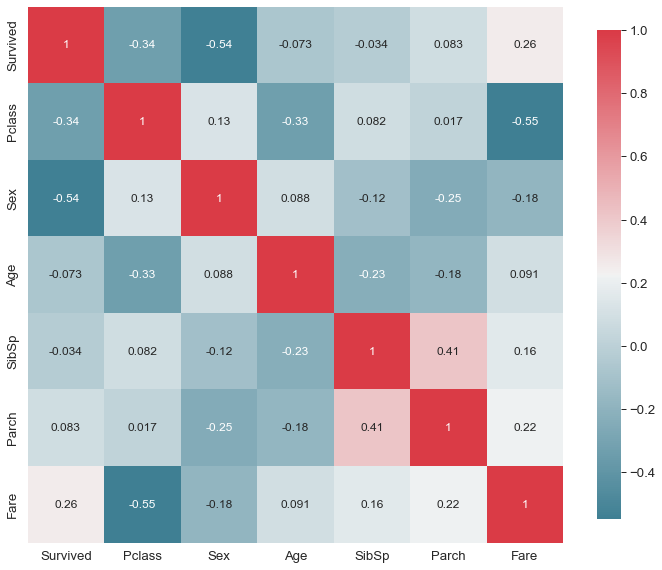

In [1227]:
   plot_correlation_map(df)

### The function above visualizes the correlation between the columns, the correlation can be in positive or negative(direct or inverse correlation),0 means no correlation,from 0.1 to 0.3 is weak,from 0.4 to 0.6 is moderate,from 0.7 to 0.9 is strong,1 means perfect correlation

In [1228]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1.0,0.626168
2.0,0.472826
3.0,0.242363


# Splitting the Name column and creating the Title Column

In [1229]:
df['Title'] = df['Name'].str.split(", ", expand=True)[1]
df['Title'] = df['Title'].str.split(".", expand=True)[0]
df.drop(['Name'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,age_range,Title
0,1,2.0,1,0,1.0,1.0,18.7500,0 ~ 10,Master
1,1,3.0,0,0,2.0,1.0,19.2583,0 ~ 10,Miss
2,1,3.0,0,0,2.0,1.0,19.2583,0 ~ 10,Miss
3,1,1.0,1,0,1.0,2.0,151.5500,0 ~ 10,Master
4,1,2.0,1,0,1.0,1.0,14.5000,0 ~ 10,Master
...,...,...,...,...,...,...,...,...,...
884,0,3.0,1,70,0.0,0.0,7.7500,70 ~ 80,Mr
885,0,1.0,1,71,0.0,0.0,34.6542,70 ~ 80,Mr
886,0,1.0,1,71,0.0,0.0,49.5042,70 ~ 80,Mr
887,0,3.0,1,74,0.0,0.0,7.7750,70 ~ 80,Mr


# In the next three plots, we will be visualizing the correlation between the Title with the Age, Fare, and Pclass.

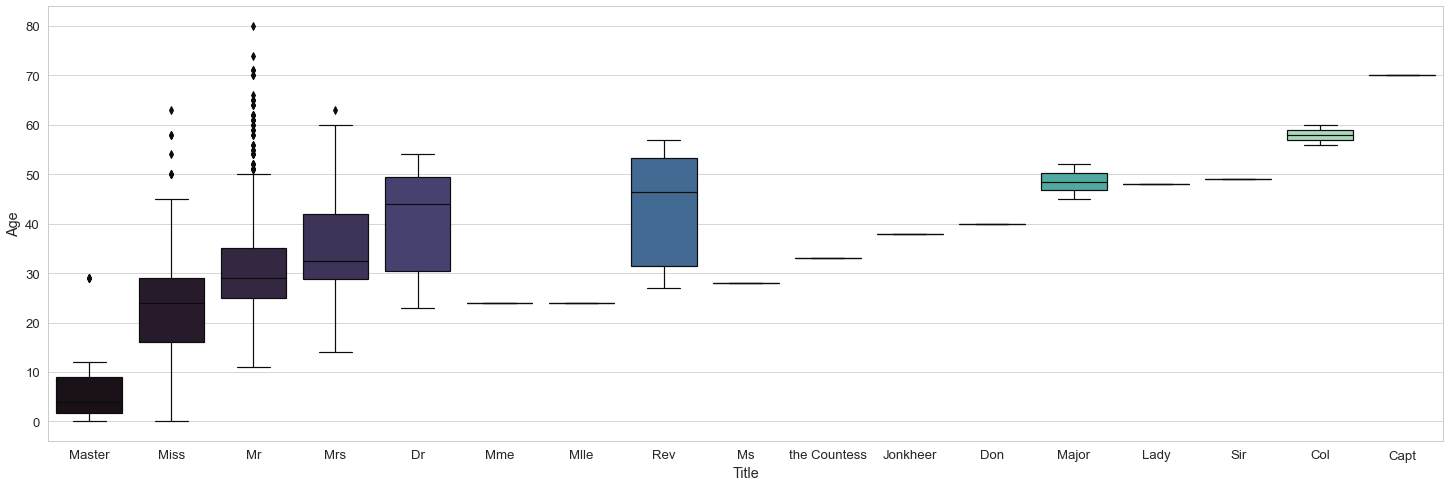

In [1230]:
sns.boxplot(x='Title', y='Age', data=df, palette='mako')
fig = plt.gcf()
fig.set_size_inches(25, 8)

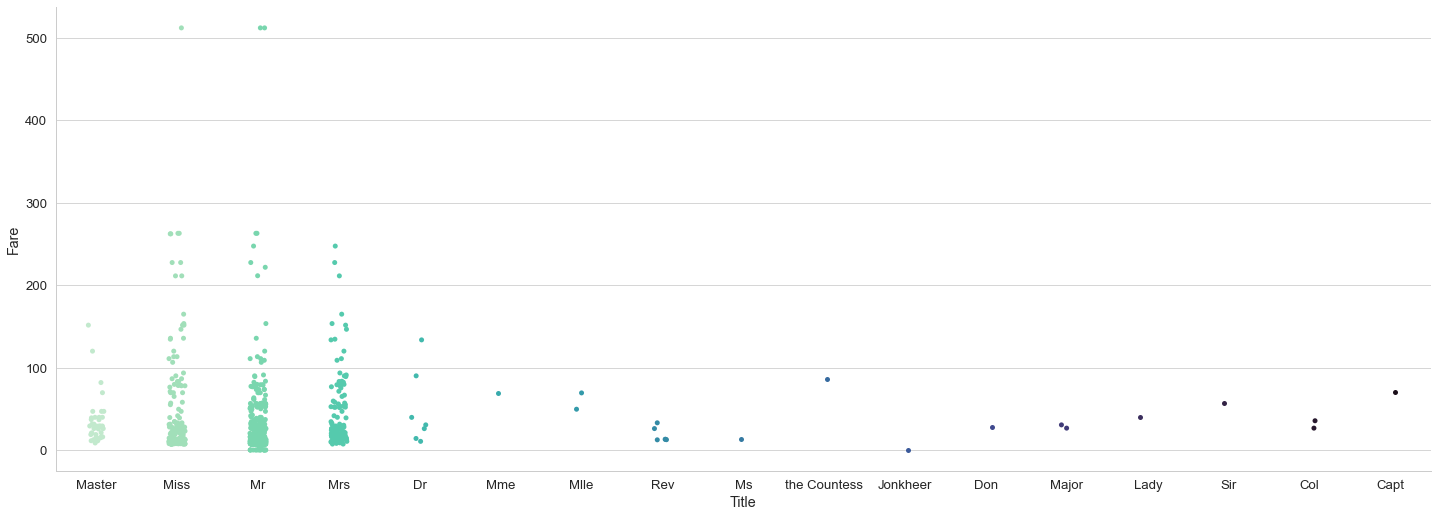

In [1231]:
sns.catplot(x='Title', y='Fare', data=df, palette='mako_r')
fig = plt.gcf()
fig.set_size_inches(25, 8)

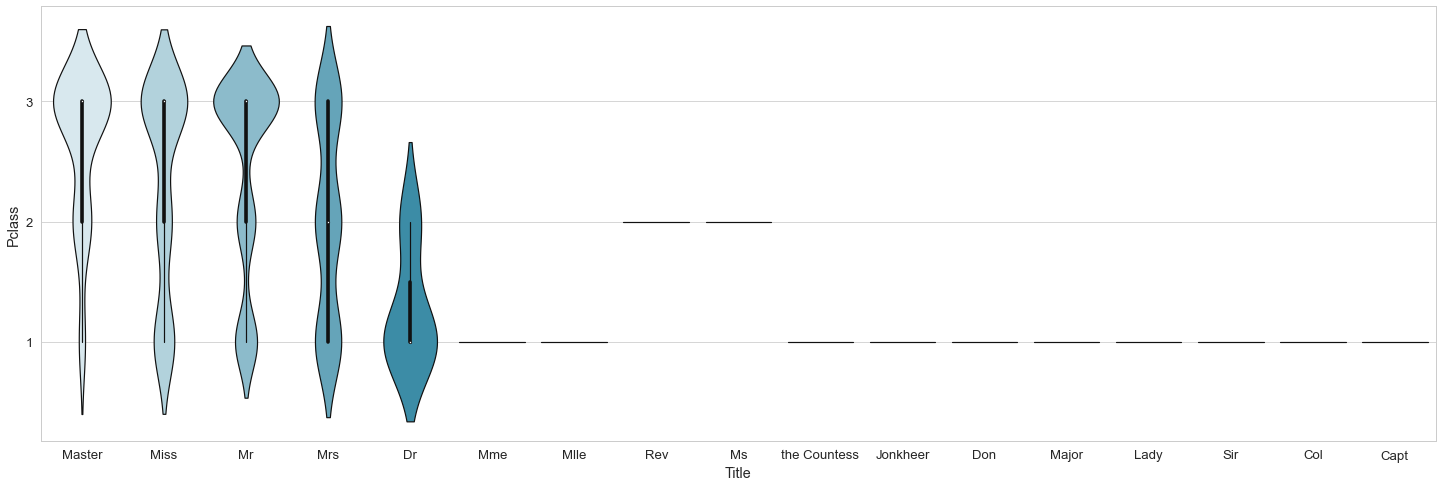

In [1232]:
g = sns.violinplot(x='Title', y='Pclass', split=True, data=df, palette='ocean_r')
ticks = [1,2,3]
g.set_yticks(ticks)
fig = plt.gcf()
fig.set_size_inches(25, 8)

# Replacing the Title column with the Title_Dictionary

In [1233]:
title_dict = {"Capt":"Officer", "Col":"Officer", "Major":"Officer", "Dr":"Officer",  "Rev":"Officer",  "Jonkheer":"Royalty", "Don":"Royalty","Sir":"Royalty",  "Lady":"Royalty", "the Countess":"Royalty", "Dona":"Royalty", "Mme":"Miss", "Mlle":"Miss", "Miss":"Miss", "Ms":"Mrs", "Mr":"Mrs", "Mrs":"Mrs", "Master":"Master"}

In [1234]:
df['Title'].replace(title_dict, inplace = True)

# Visualizing the same three plots after we replaced the Title column with the dictionary

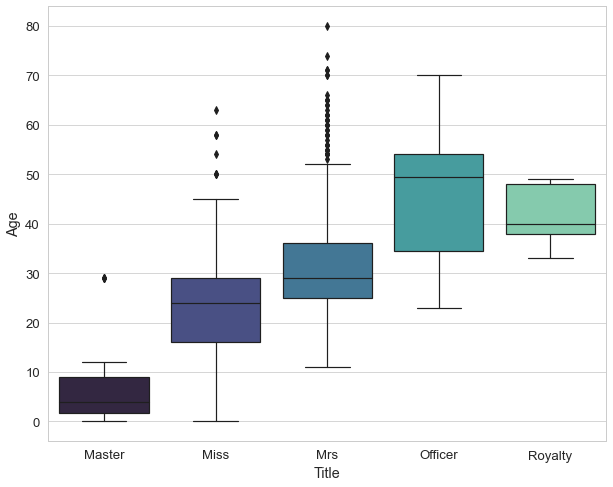

In [1235]:
sns.boxplot(x='Title', y='Age', data=df, palette='mako')
fig = plt.gcf()
fig.set_size_inches(10, 8)

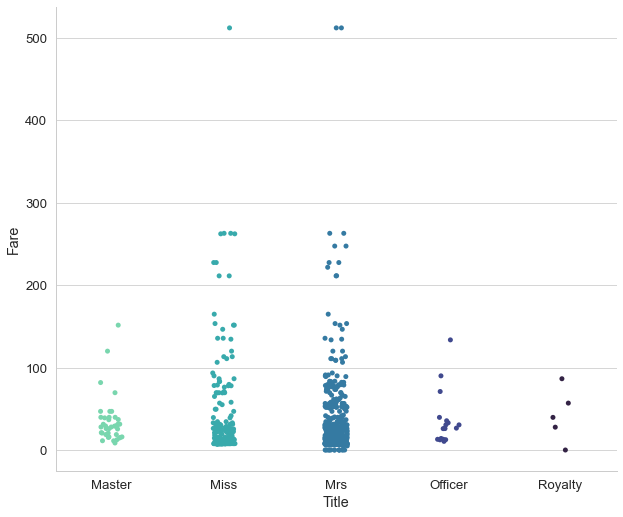

In [1236]:
sns.catplot(x='Title', y='Fare', data=df, palette='mako_r')
fig = plt.gcf()
fig.set_size_inches(10, 8)

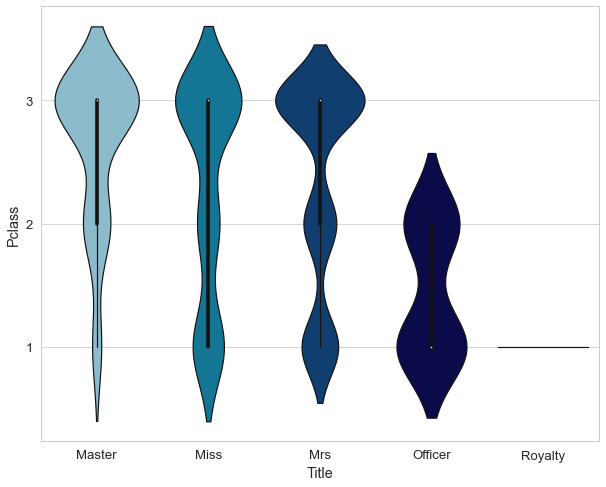

In [1237]:
g = sns.violinplot(x='Title', y='Pclass', split=True, data=df, palette='ocean_r')
ticks = [1,2,3]
g.set_yticks(ticks)
fig = plt.gcf()
fig.set_size_inches(10, 8)

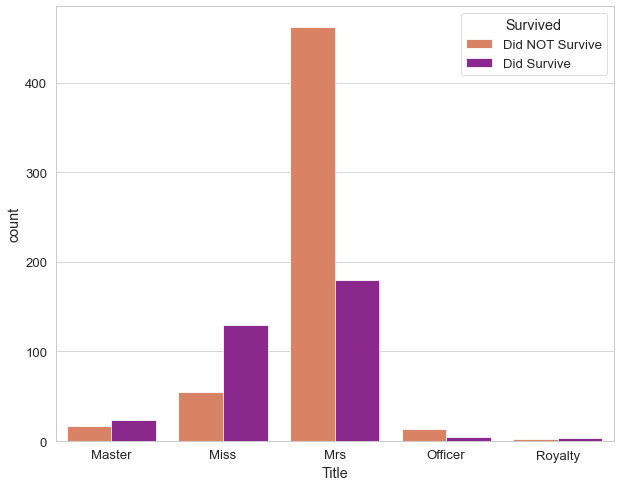

In [1238]:
sns.countplot(x='Title', data=df, hue='Survived', palette='plasma_r')
plt.legend(title='Survived', loc='upper right', labels=['Did NOT Survive', 'Did Survive'])
fig = plt.gcf()
fig.set_size_inches(10, 8)

# Creating the Family size column 

In [1239]:
df['Family size'] = df['Parch'] + df['SibSp']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,age_range,Title,Family size
0,1,2.0,1,0,1.0,1.0,18.7500,0 ~ 10,Master,2.0
1,1,3.0,0,0,2.0,1.0,19.2583,0 ~ 10,Miss,3.0
2,1,3.0,0,0,2.0,1.0,19.2583,0 ~ 10,Miss,3.0
3,1,1.0,1,0,1.0,2.0,151.5500,0 ~ 10,Master,3.0
4,1,2.0,1,0,1.0,1.0,14.5000,0 ~ 10,Master,2.0
...,...,...,...,...,...,...,...,...,...,...
884,0,3.0,1,70,0.0,0.0,7.7500,70 ~ 80,Mrs,0.0
885,0,1.0,1,71,0.0,0.0,34.6542,70 ~ 80,Mrs,0.0
886,0,1.0,1,71,0.0,0.0,49.5042,70 ~ 80,Mrs,0.0
887,0,3.0,1,74,0.0,0.0,7.7750,70 ~ 80,Mrs,0.0


# Visualizing the correlation between the Family size and the Survived column 

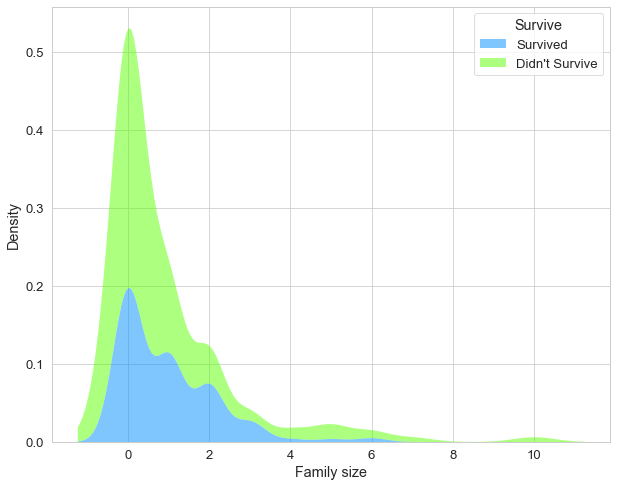

In [1242]:
sns.kdeplot(data=df, x='Family size', hue='Survived', multiple='stack', palette="gist_rainbow",
   alpha=.5, linewidth=0,)
plt.legend(title='Survive', loc='best', labels=['Survived', "Didn't Survive"])
fig = plt.gcf()
fig.set_size_inches(10, 8)

### We can conclude that as the family size increases, the survival rate decreases, creating a negative correlation between these two columns.